Target Parameters are Efficiency_Status                
Features are Usage_Hours,Energy_Consumption,User_Preferences ,Malfunction_Count,Device_Age,Device_Type

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Machine Learning/smart_home_device_usage_data.csv")   # <-- replace with actual file name
df.head()


,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


EDA

In [ ]:
data.shape

(5403, 9)

In [ ]:
data.columns

Index(['UserID', 'DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency', 'MalfunctionBin'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   UserID                5403 non-null   float64 
 1   DeviceType            5403 non-null   object  
 2   UsageHoursPerDay      5403 non-null   float64 
 3   EnergyConsumption     5403 non-null   float64 
 4   UserPreferences       5403 non-null   float64 
 5   MalfunctionIncidents  5403 non-null   float64 
 6   DeviceAgeMonths       5403 non-null   float64 
 7   SmartHomeEfficiency   5403 non-null   int64   
 8   MalfunctionBin        5403 non-null   category
dtypes: category(1), float64(6), int64(1), object(1)
memory usage: 343.2+ KB


In [ ]:
data.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5.403000e+03,5.403000e+03,5.403000e+03,5.403000e+03,5.403000e+03,5403.000000
mean,0.000000,1.972634e-17,-4.339795e-17,2.761687e-17,2.630179e-17,-2.564424e-17,0.376643
std,1.000093,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,0.484589
min,-1.731730,-1.720460e+00,-1.720493e+00,-1.023788e+00,-1.452012e+00,-1.725370e+00,0.000000
25%,-0.865865,-8.571388e-01,-8.786452e-01,-1.023788e+00,-7.493499e-01,-9.013053e-01,0.000000
50%,0.000000,-2.222461e-02,-1.641539e-02,9.767644e-01,-4.668806e-02,-1.837865e-02,0.000000
75%,0.865865,8.547020e-01,8.884678e-01,9.767644e-01,6.559738e-01,8.645481e-01,1.000000
max,1.731730,1.777440e+00,1.717377e+00,9.767644e-01,1.358636e+00,1.688613e+00,1.000000


In [ ]:
data.isna().sum()

,0
UserID,0
DeviceType,0
UsageHoursPerDay,0
EnergyConsumption,0
UserPreferences,0
MalfunctionIncidents,0
DeviceAgeMonths,0
SmartHomeEfficiency,0
MalfunctionBin,0


In [ ]:
data.dropna(inplace=True) #dropna is used for dropping null values ,incase if we have got any null values above so we can drop it using

In [ ]:
data.skew(numeric_only=True) #Calculate skewness for all numeric columns and ignore non-numeric (string, date, etc.) columns.

,0
UserID,-8.418909e-17
UsageHoursPerDay,4.988617e-02
EnergyConsumption,8.124977e-03
UserPreferences,-4.703697e-02
MalfunctionIncidents,-7.629797e-02
DeviceAgeMonths,-9.516099e-03
SmartHomeEfficiency,5.093103e-01


In [ ]:
import seaborn as sns # Seaborn (import seaborn as sns)
 #→ Built on top of Matplotlib. Makes beautiful, statistical plots with less code.

In [ ]:
import matplotlib.pyplot as plt #Matplotlib (import matplotlib.pyplot as plt)
# → Base plotting library in Python. It provides low-level control over plots.

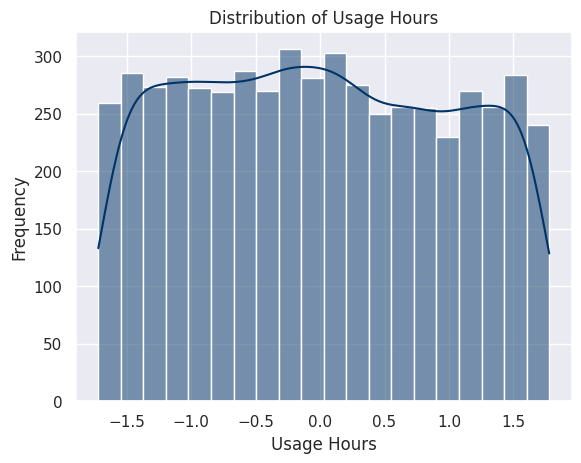

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data["UsageHoursPerDay"], kde=True, bins=20, color="#003366")
plt.title("Distribution of Usage Hours")
plt.xlabel("Usage Hours")
plt.ylabel("Frequency")
plt.show()

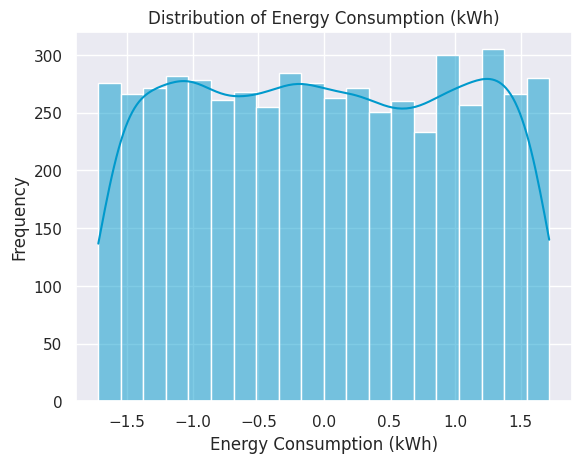

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data["EnergyConsumption"], kde=True, bins=20, color="#0099cc")
plt.title("Distribution of Energy Consumption (kWh)")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()

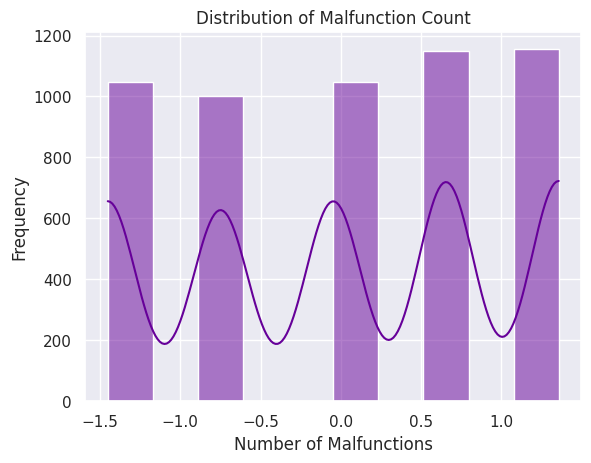

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data["MalfunctionIncidents"], kde=True, bins=10, color="#660099")
plt.title("Distribution of Malfunction Count")
plt.xlabel("Number of Malfunctions")
plt.ylabel("Frequency")
plt.show()

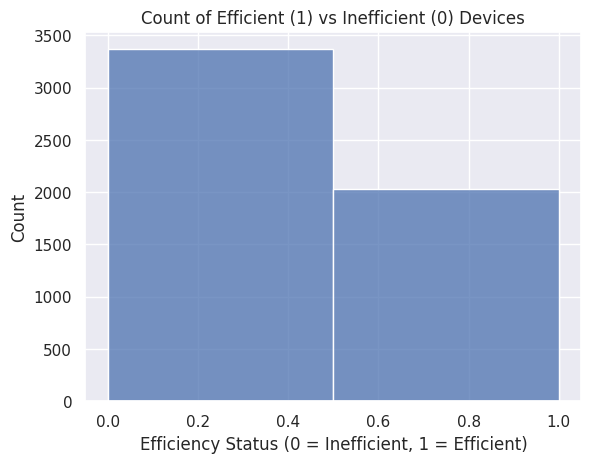

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data["SmartHomeEfficiency"], bins=2)
plt.title("Count of Efficient (1) vs Inefficient (0) Devices")
plt.xlabel("Efficiency Status (0 = Inefficient, 1 = Efficient)")
plt.ylabel("Count")
plt.show()

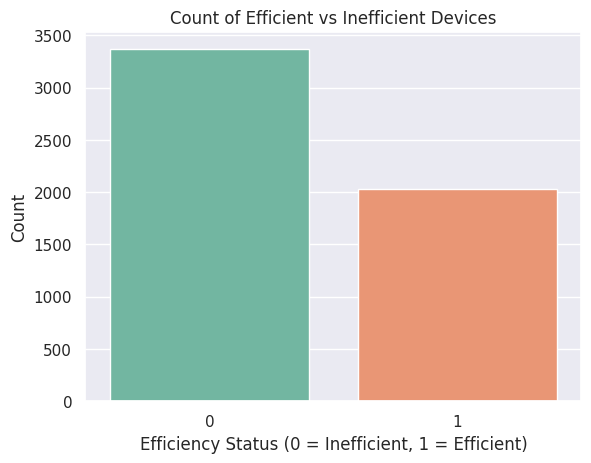

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="SmartHomeEfficiency", data=data, hue="SmartHomeEfficiency", palette="Set2", legend=False)
plt.title("Count of Efficient vs Inefficient Devices")
plt.xlabel("Efficiency Status (0 = Inefficient, 1 = Efficient)")
plt.ylabel("Count")
plt.show()

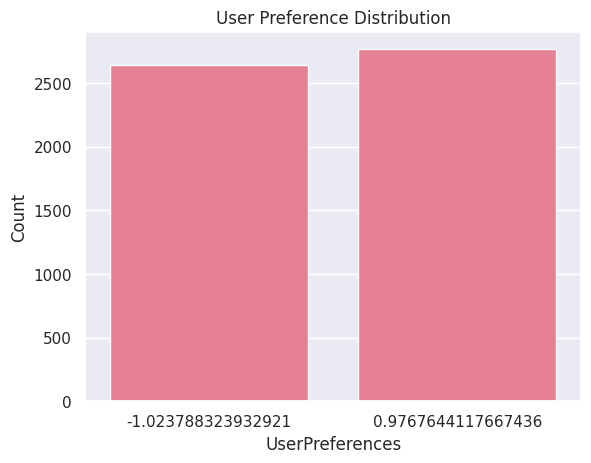

In [ ]:
sns.countplot(x="UserPreferences", data=data, hue="UserPreferences", palette="husl", legend=False)
plt.title("User Preference Distribution")
plt.xlabel("UserPreferences")
plt.ylabel("Count")
plt.show()

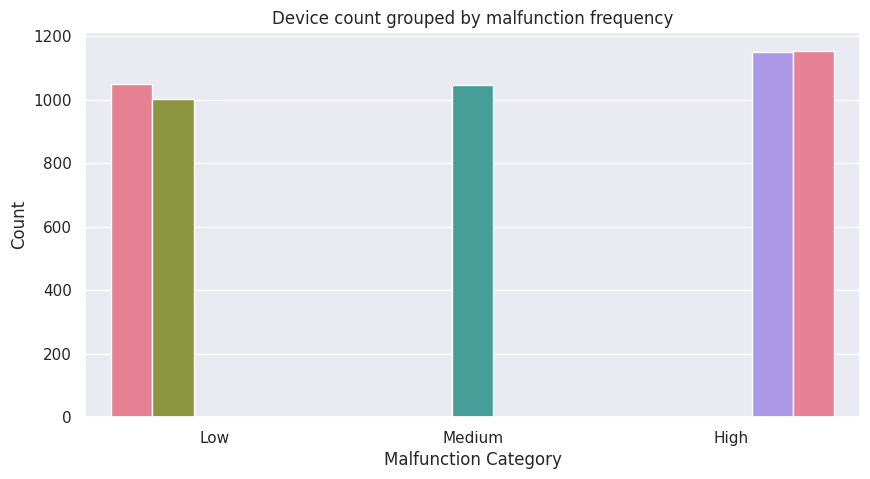

In [ ]:
data["MalfunctionBin"] = pd.cut(data["MalfunctionIncidents"], bins=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(10, 5)) # Added to increase figure size
sns.countplot(x="MalfunctionBin", data=data,  hue="MalfunctionIncidents", palette="husl", legend=False)
plt.title("Device count grouped by malfunction frequency")
plt.xlabel("Malfunction Category")
plt.ylabel("Count")
plt.show()

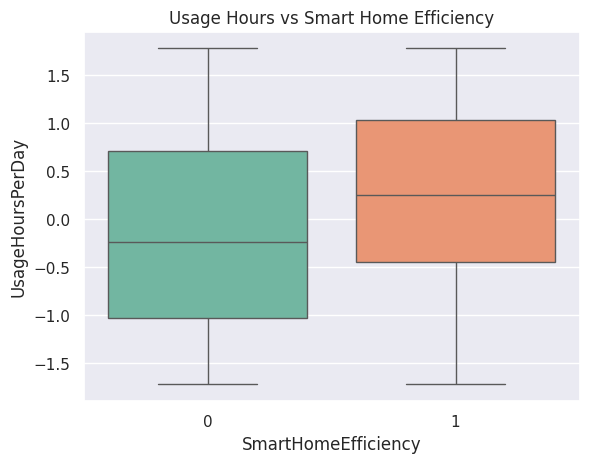

In [ ]:
sns.boxplot(x="SmartHomeEfficiency", y="UsageHoursPerDay", data=data, hue="SmartHomeEfficiency" ,palette="Set2" ,legend=False)
plt.title("Usage Hours vs Smart Home Efficiency")
plt.show()

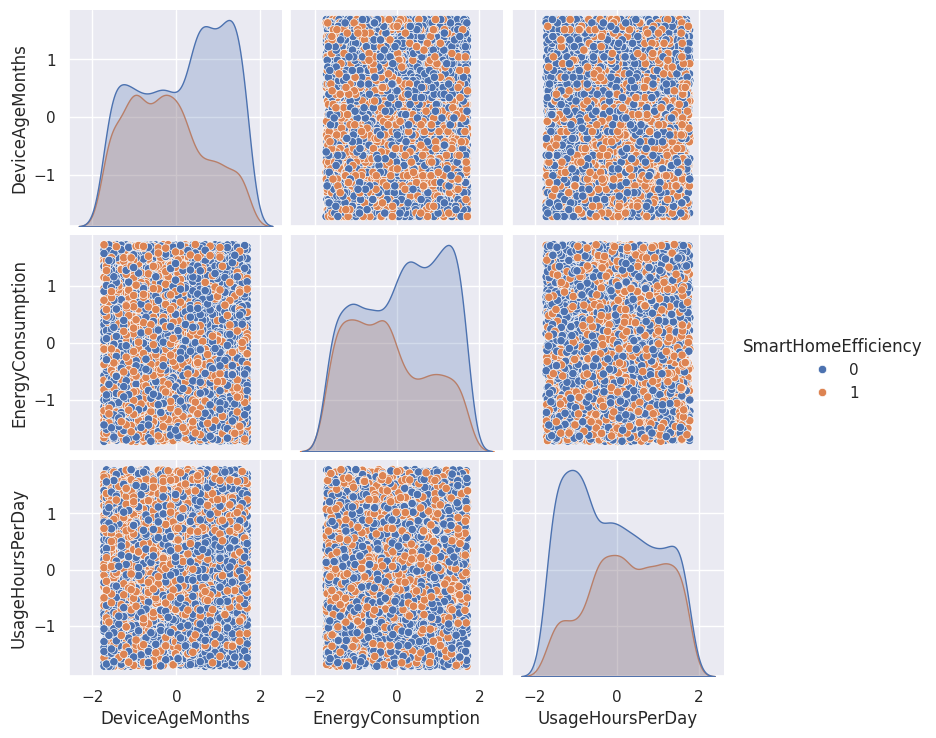

In [ ]:
sns.pairplot(data[['DeviceAgeMonths','EnergyConsumption','UsageHoursPerDay','SmartHomeEfficiency']], hue='SmartHomeEfficiency')

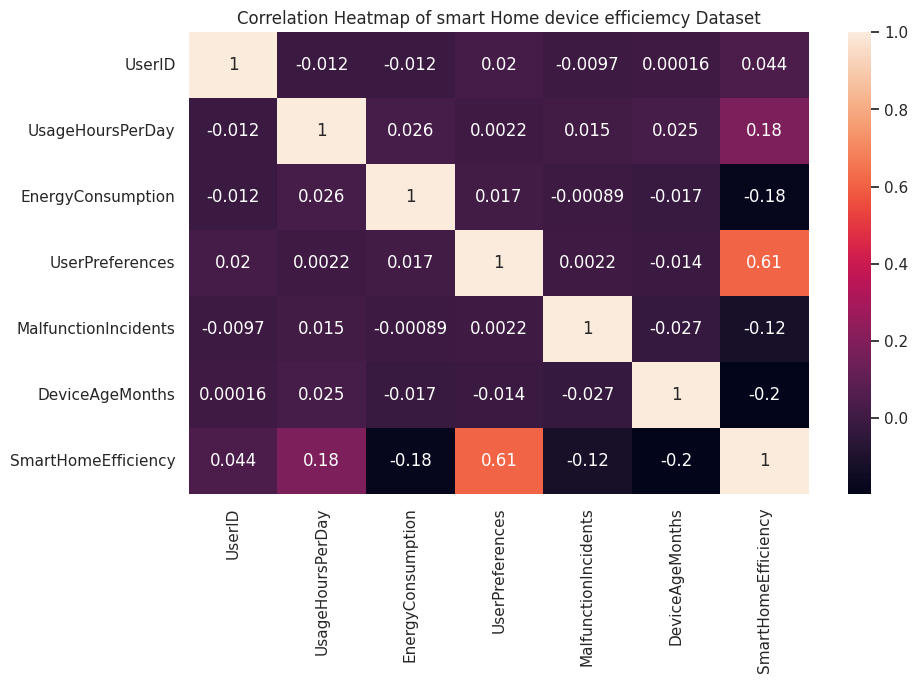

In [ ]:
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True) # for showing no.s annot=True # here error is due to some values are in the categorical
plt.title("Correlation Heatmap of smart Home device efficiemcy Dataset")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()

# Select numerical columns excluding the target variable
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('SmartHomeEfficiency') # Corrected: 'charges' replaced with 'SmartHomeEfficiency'

# Apply scaling to the selected numerical columns
data[numerical_cols] = rs.fit_transform(data[numerical_cols])

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split # we are importing the data for train & test

In [ ]:
X = data.drop("SmartHomeEfficiency", axis=1)  # Corrected: use 'SmartHomeEfficiency' as the target column
y = data["SmartHomeEfficiency"]

In [ ]:
# splitting for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42 ) # jab ham firse run karenge toh if we dont write random data toh alag alag data lega
# we can write anything instead of 42 its ideal 42

In [ ]:
# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to training data
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)

# Apply one-hot encoding to test data
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Align columns - this is crucial if some categories are not present in both train and test sets
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the encoded training data
lr.fit(x_train_encoded, y_train)

LinearRegression()

In [ ]:
# predicting
y_pred=lr.predict(x_test_encoded)

In [ ]:
# imprting libraries for
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
# mean absoute error = avg of error ky range me model galat peform krta h
# mean sq error = sq kr deta h error ka
#r2 jeetba closer to 1 h utna aacha perform kr rha h jab 0 k aspas h toh bura perform kr rha h
# if its in -ve toh sabse bura h vo
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2) # value mostly 90% k uppar  kahi par bhi aur ye 99% or 1% ni chaiye hame

MAE is 0.27502695870808674
MSE is 0.11538267424324235
R2 is 0.5065339848029253


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train_encoded,y_train)

y_pred_dtr=dtr.predict(x_test_encoded)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2=r2_score(y_test,y_pred_dtr)

In [ ]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.041628122109158186
MSE is 0.041628122109158186
R2 is 0.821965787566701


In [ ]:
# Random Tree
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train_encoded,y_train)

y_pred_rfr=rfr.predict(x_test_encoded)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2=r2_score(y_test,y_pred_rfr)

In [ ]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.05049028677150787
MSE is 0.029556891766882514
R2 is 0.8735917528565259


In [ ]:
# for XG boost
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_encoded,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred_gbr = gbr.predict(x_test_encoded)
mae=mean_absolute_error(y_test,y_pred_gbr)
mse=mean_squared_error(y_test,y_pred_gbr)
r2=r2_score(y_test,y_pred_gbr)

In [ ]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.17961614937341622
MSE is 0.060860608998626504
R2 is 0.7397127220183287


In [ ]:
# konsa column hame sabse zyda useful h for building model
# for random forest since uska r ka value zyda h
importance=rfr.feature_importances_  # features ka naam h
# Get feature names after one-hot encoding
features = x_train_encoded.columns # Corrected: use x_train_encoded.columns to get feature names

In [ ]:
# Creating Data Frame
fea_imp= pd.DataFrame({"Features":features,"Importance":importance})

In [ ]:
fea_imp.head()

,Features,Importance
0,UserID,0.109176
1,UsageHoursPerDay,0.141976
2,EnergyConsumption,0.147897
3,UserPreferences,0.365039
4,MalfunctionIncidents,0.090070


from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Features').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Features'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Importance', y='Features', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Features').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Importance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Features')):
  _plot_series(series, series_name, i)
  fig.legend(title='Features', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Importance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Features')):
  _plot_series(series, series_name, i)
  fig.legend(title='Features', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Features'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Features', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Features'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Importance', y='Features', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# value as per imprtance
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [ ]:
fea_imp.head()

,Features,Importance
10,MalfunctionBin_Medium,0.000861
11,MalfunctionBin_High,0.001368
8,DeviceType_Smart Speaker,0.001846
6,DeviceType_Lights,0.002617
7,DeviceType_Security System,0.002668


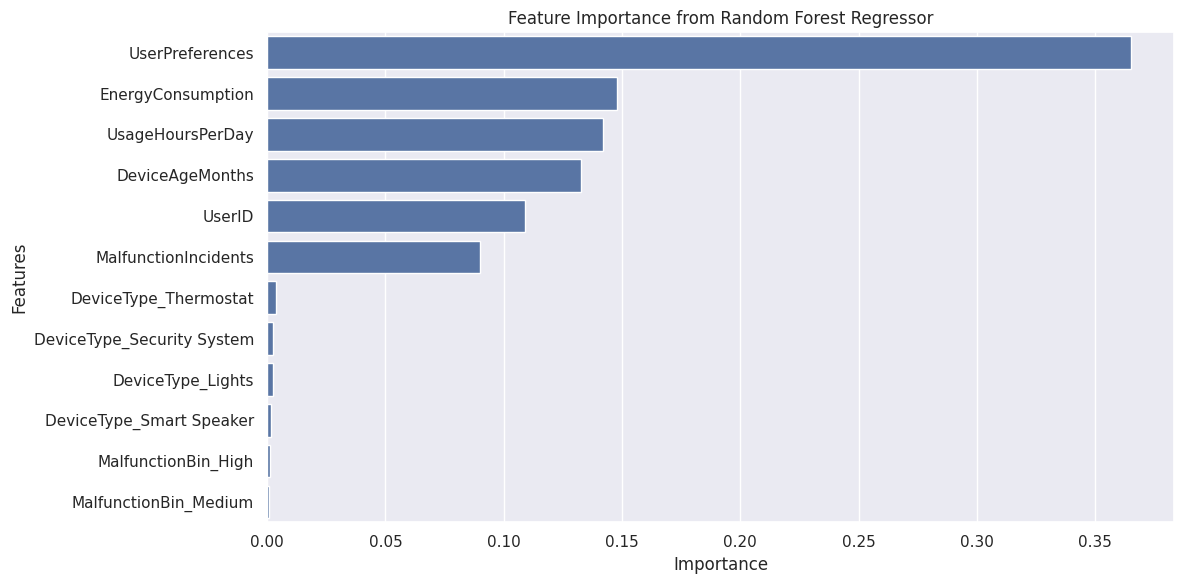

In [ ]:
# we are going to visualize it by horizontal bar grph
plt.figure(figsize=(12,6)) # Increased figure size for better readability
sns.barplot(data=fea_imp, x="Importance", y="Features")
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.title("Feature Importance from Random Forest Regressor")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import pandas as pd

# Create a dictionary to store the metrics for each model
model_performance = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dtr), mean_absolute_error(y_test, y_pred_rfr)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dtr), mean_squared_error(y_test, y_pred_rfr)],
    'R2': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dtr), r2_score(y_test, y_pred_rfr)]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
display(performance_df)

,Model,MAE,MSE,R2
0,Linear Regression,0.275027,0.115383,0.506534
1,Decision Tree Regressor,0.041628,0.041628,0.821966
2,Random Forest Regressor,0.050490,0.029557,0.873592


In [ ]:
# Save the best performing model (Random Forest Regressor)
import joblib
filename = 'random_forest_regressor_model.joblib'
joblib.dump(rfr, filename)

# Download the saved model file
# files.download(filename)

['random_forest_regressor_model.joblib']

In [ ]:
from google.colab import files

# Download the saved model file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded=files.upload()

Saving random_forest_regressor_model (3).joblib to random_forest_regressor_model (3).joblib


In [ ]:
import joblib

# The file was uploaded and is available in the Colab environment.
# The filename from the upload is 'random_forest_regressor_model (2).joblib'.
# We can directly load it using joblib.load()

loaded_model = joblib.load('random_forest_regressor_model (3).joblib')

# You can now use the loaded_model for making predictions or further analysis
print("Model loaded successfully!")

Model loaded successfully!
